### Ejercicio 1

#### Página 8

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

img = cv2.imread('p8-rose.tif', cv2.IMREAD_UNCHANGED)

def decimar(imagen, factor):
    return imagen[::factor, ::factor]

# Factores de decimación
factores = [1, 2, 4, 8, 16, 32]

# Carpeta de salida
output_dir = "rosas decimadas"
os.makedirs(output_dir, exist_ok=True)

for f in factores:
    decimada = decimar(img, f)
    h, w = decimada.shape[:2]
    archivo = os.path.join(output_dir, f"imagen_{w}x{h}.tif")
    cv2.imwrite(archivo, decimada)
    # cv2.imshow las muestra en tamaño real
    cv2.imshow(f"{h}x{w}", decimada)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Página 9

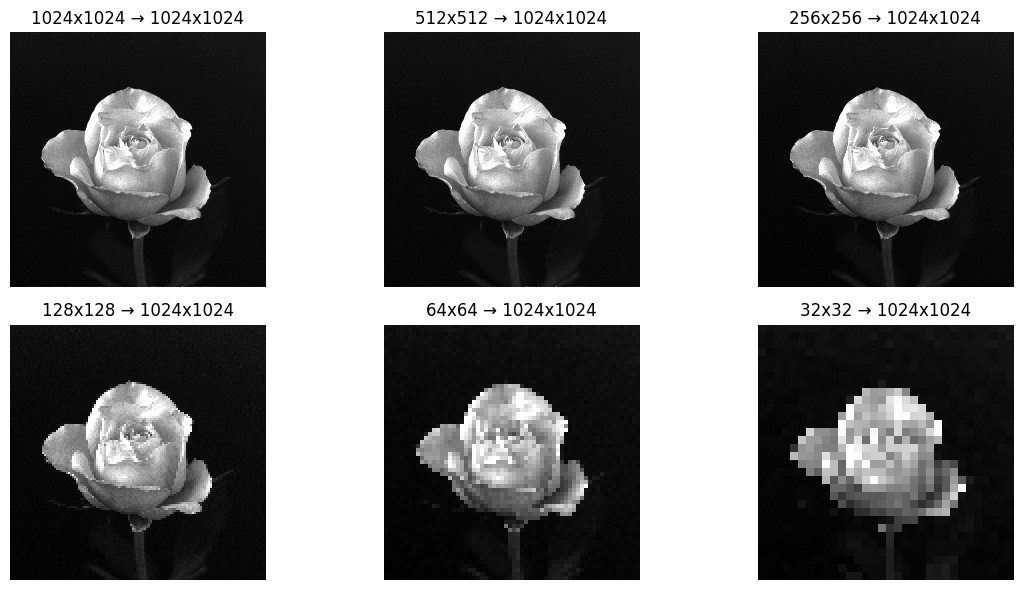

In [32]:
# Dimensiones originales
h0, w0 = img.shape[:2]
target_size = (w0, h0)   # (ancho, alto)

factores = [1, 2, 4, 8, 16, 32]

output_dir = "rosas expandidas"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(12, 6))

for i, f in enumerate(factores, 1):
    decimada = decimar(img, f)
    h, w = decimada.shape[:2]

    # Expansión replicando píxeles hasta tamaño original usando cv2INTER_NEAREST
    expandida = cv2.resize(decimada, target_size, interpolation=cv2.INTER_NEAREST)

    archivo = os.path.join(output_dir, f"imagen_{w}x{h}_expandida.tif")
    cv2.imwrite(archivo, expandida)

    plt.subplot(2, 3, i)
    plt.imshow(expandida, cmap="gray", interpolation="none")
    plt.title(f"{w}x{h} → {w0}x{h0}")
    plt.axis("off")

plt.tight_layout()
plt.show()

#### Página 10

In [33]:
img = cv2.imread('p10-building.jpg', cv2.IMREAD_UNCHANGED)

def decimar(imagen, factor):
    return imagen[::factor, ::factor]

# Factores de decimación
factores = [1, 2, 4, 8]

# Carpeta de salida
output_dir = "edificios decimadas"
os.makedirs(output_dir, exist_ok=True)

for f in factores:
    decimada = decimar(img, f)
    h, w = decimada.shape[:2]
    archivo = os.path.join(output_dir, f"imagen_{w}x{h}.tif")
    cv2.imwrite(archivo, decimada)
    # cv2.imshow las muestra en tamaño real
    cv2.imshow(f"{h}x{w}", decimada)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Página 11

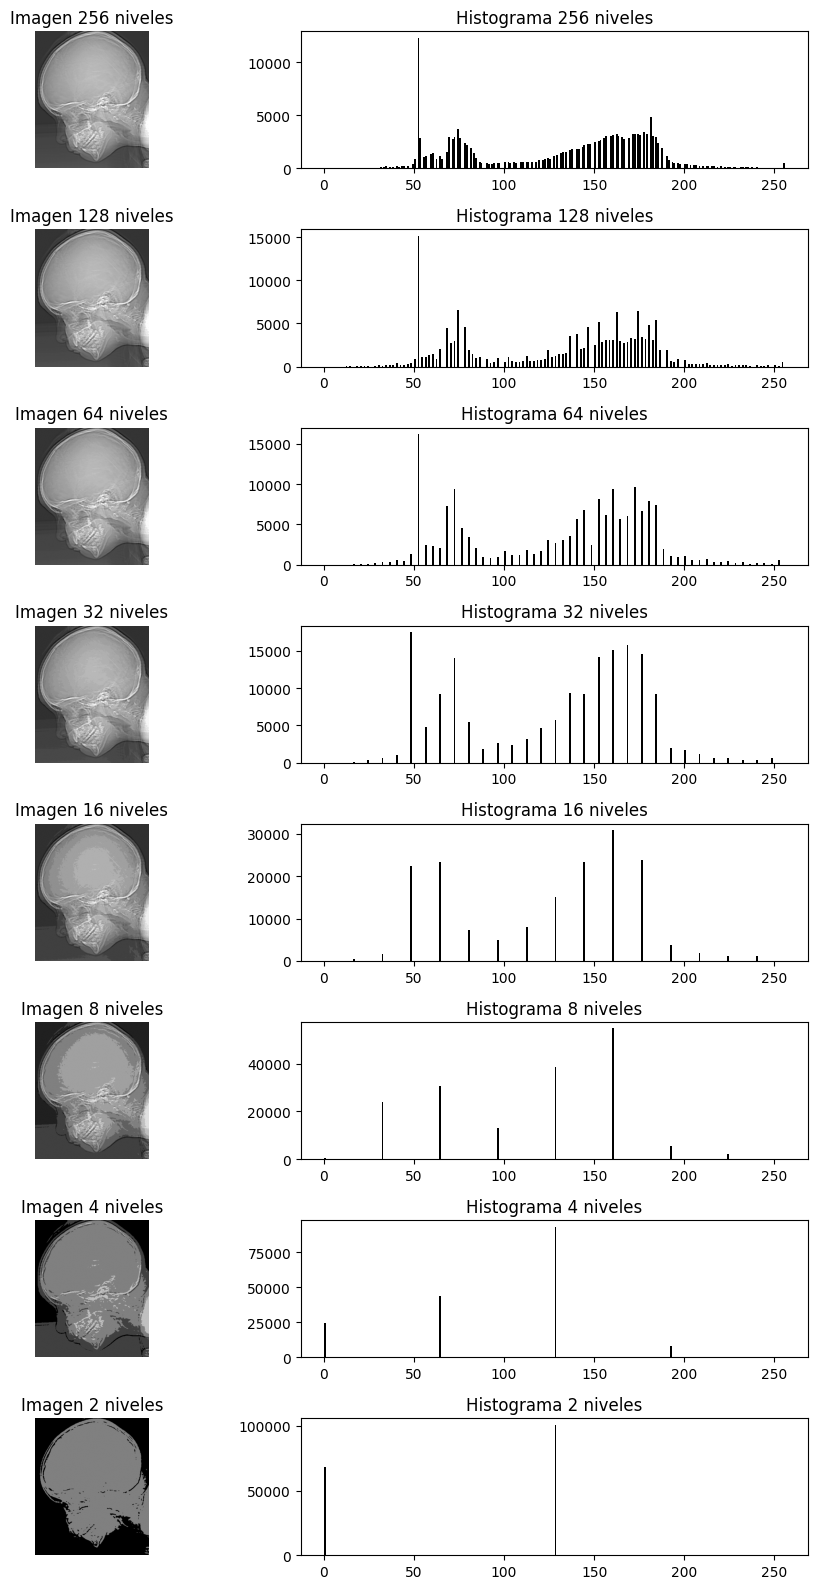

In [38]:
img = cv2.imread("p11-skull.tif", cv2.IMREAD_GRAYSCALE)

output_dir = "skull niveles de grises"
os.makedirs(output_dir, exist_ok=True)

levels = [256, 128, 64, 32, 16, 8, 4, 2]

fig, axes = plt.subplots(len(levels), 2, figsize=(10, 2 * len(levels)))

for i, L in enumerate(levels):
    # Cuantización
    quantized = (img / (256 // L)).astype(np.uint8) * (256 // L)

    filename = os.path.join(output_dir, f"imagen_{L}niveles.tif")
    cv2.imwrite(filename, quantized)

    # Imagen en columna 1
    axes[i, 0].imshow(quantized, cmap="gray", vmin=0, vmax=255)
    axes[i, 0].set_title(f"Imagen {L} niveles")
    axes[i, 0].axis("off")

    # Histograma en columna 2
    axes[i, 1].hist(quantized.ravel(), bins=256, range=[0, 256], color="black")
    axes[i, 1].set_title(f"Histograma {L} niveles")

plt.tight_layout()
plt.show()

En el histograma de 2 niveles se observa claramente que la imagen toma como valor más bajo el 0 pero no toma el 255 como valor más alto, con lo cual queda desaprovechado el contraste que podría tener la imagen de 2 niveles.

Para solucionar esto se propone otra forma de tratar a la imagen, escalándola al rango [0, L-1] y luego cuantizándola para lograr una distribución uniforme:

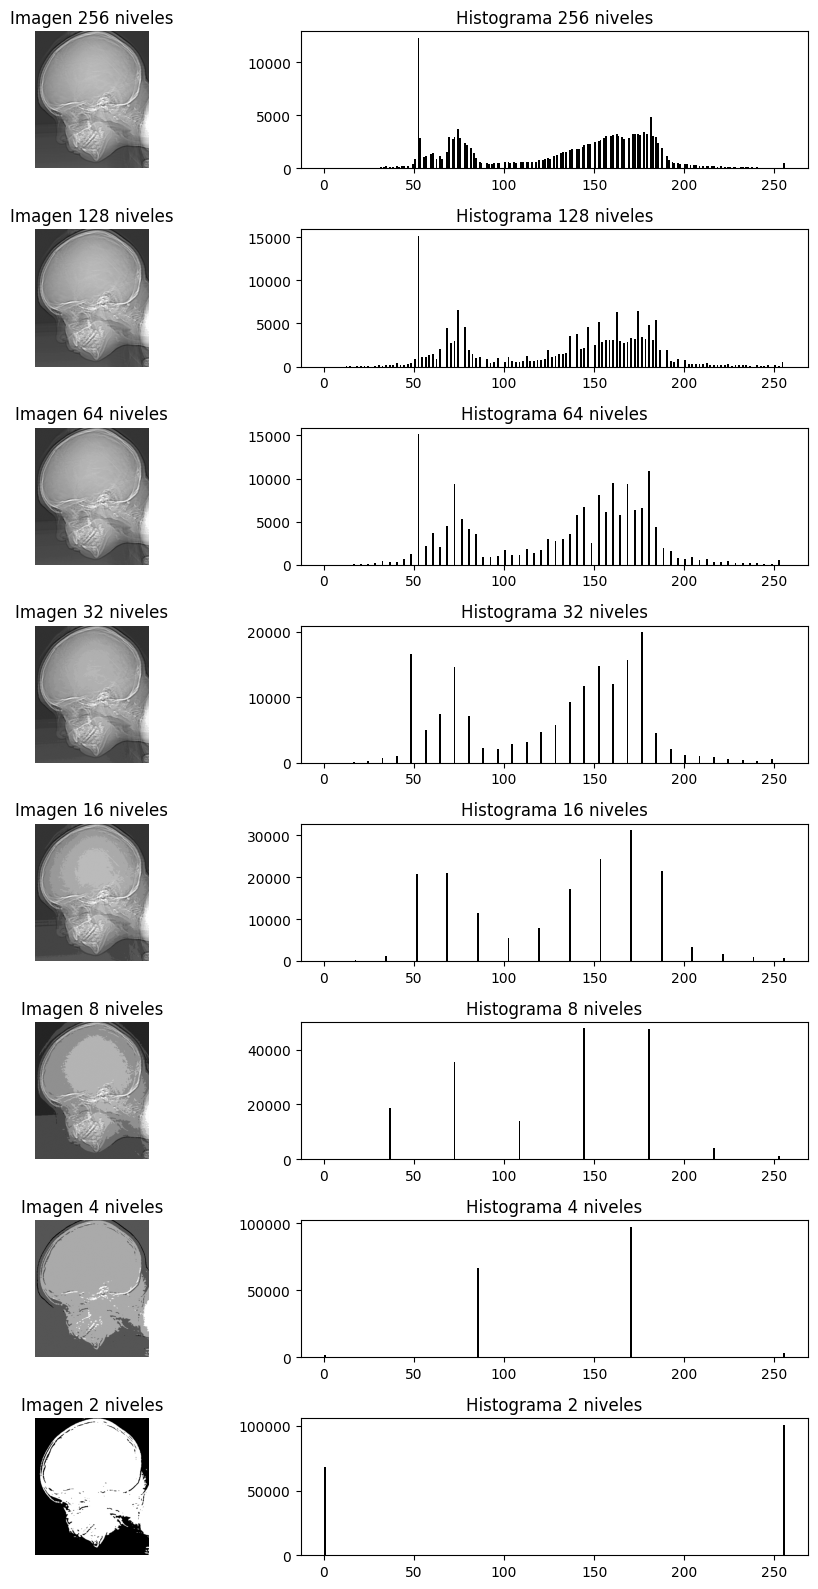

In [42]:
output_dir = "skull niveles de grises (uniforme)"
os.makedirs(output_dir, exist_ok=True)

fig, axes = plt.subplots(len(levels), 2, figsize=(10, 2 * len(levels)))

for i, L in enumerate(levels):
    # Escalar imagen a rango [0, L-1]
    img_scaled = (img.astype(np.float32) / 255.0) * (L - 1)
    img_scaled = np.round(img_scaled).astype(np.uint8)

    # Mapear a valores equiespaciados en [0, 255]
    quantized = (img_scaled * (255 // (L - 1))).astype(np.uint8)

    filename = os.path.join(output_dir, f"imagen_{L}niveles uniforme.tif")
    cv2.imwrite(filename, quantized)

    # Imagen en columna 1
    axes[i, 0].imshow(quantized, cmap="gray", vmin=0, vmax=255)
    axes[i, 0].set_title(f"Imagen {L} niveles")
    axes[i, 0].axis("off")

    # Histograma en columna 2
    axes[i, 1].hist(quantized.ravel(), bins=256, range=[0, 256], color="black")
    axes[i, 1].set_title(f"Histograma {L} niveles")

plt.tight_layout()
plt.show()